# The heart in the Tenakh (BHSA)

## Table of content <a class="anchor" id="TOC"></a> (TOC)

* <a href="#bullet1">1 - Introduction</a>
* <a href="#bullet2">2 - Load Text-Fabric app and data</a>
* <a href="#bullet3">3 - Performing the queries</a>
    * <a href="#bullet3x1">3.1 - Print table with frequency for lev and levev</a>
    * <a href="#bullet3x2">3.2 - Plotting the frequency per book</a>
* <a href="#bullet4">4 - Required libraries</a>
* <a href="#bullet5">5 - Notebook details</a>


# 1 - Introduction <a class="anchor" id="bullet1"></a>
##### [Back to TOC](#TOC)

In Hebrew, the words for "heart" are written as follows:

- לֵב ("lev"): This is the shorter form commonly used to mean "heart."
- לֵבָב ("levav"): This is a slightly longer, more poetic or emphatic form of the word, also meaning "heart."

This Jupyter NoteBook investigates occurances per book.

# 2 - Load Text-Fabric app and data <a class="anchor" id="bullet2"></a>
##### [Back to TOC](#TOC)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Loading the Text-Fabric code
# Note: it is assumed Text-Fabric is installed in your environment.
from tf.fabric import Fabric
from tf.app import use

In [3]:
# load the BHSL app and data
BHS = use ("etcbc/BHSA",hoist=globals())

**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,39,10938.21,100
chapter,929,459.19,100
lex,9230,46.22,100
verse,23213,18.38,100
half_verse,45179,9.44,100
sentence,63717,6.70,100
sentence_atom,64514,6.61,100
clause,88131,4.84,100
clause_atom,90704,4.70,100
phrase,253203,1.68,100


Note: Thefeature documentation can be found at [ETCBC GitHub](https://github.com/ETCBC/bhsa/blob/master/docs/features/0_home.md) 

In [4]:
# The following will push the Text-Fabric stylesheet to this notebook (to facilitate proper display with notebook viewer)
BHS.dh(BHS.getCss())

# 3 - Performing the queries <a class="anchor" id="bullet3"></a>
##### [Back to TOC](#TOC)

## 3.1 - Print table with frequency for lev and levev <a class="anchor" id="bullet3x1"></a>

In [5]:
levQuery = '''
book
  chapter
     verse
       word lex=LBB/|LB/ 
'''

levResults = BHS.search(levQuery)

  0.57s 861 results


In [6]:
# Libraries for table formatting and data display
import pandas as pd
from IPython.display import display

# Initialize dictionary for storing results
resultDict = {}

# Process each item in the levResults
for item in levResults:
    book = F.book.v(item[0])
    lex = F.lex.v(item[3])
    
    if book in resultDict:
        # If it exists, add the count to the existing value
        resultDict[book][0] += 1
        if lex == 'LB/':
            resultDict[book][1] += 1
        else:
            resultDict[book][2] += 1
    else:
        # If it doesn't exist, initialize the count as the value
        if lex == 'LB/':
            resultDict[book] = [1, 1, 0]
        else:
            resultDict[book] = [1, 0, 1]

# Convert the dictionary into a DataFrame and sort by total frequency
tableData = pd.DataFrame(
    [[key, value[0], value[1], value[2]] for key, value in resultDict.items()],
    columns=["Book", "Total", "Lev", "Levav"]
)
tableData = tableData.sort_values(by="Total", ascending=False)

# Display the table
display(tableData)

,Book,Total,Lev,Levav
24,Psalmi,137,102,35
26,Proverbia,99,97,2
12,Jeremia,66,58,8
4,Deuteronomium,51,4,47
11,Jesaia,49,31,18
13,Ezechiel,47,41,6
1,Exodus,47,46,1
36,Chronica_II,44,16,28
29,Ecclesiastes,42,41,1
9,Reges_I,37,14,23


## 3.2 - Plotting the frequency per book <a class="anchor" id="bullet3x2"></a>

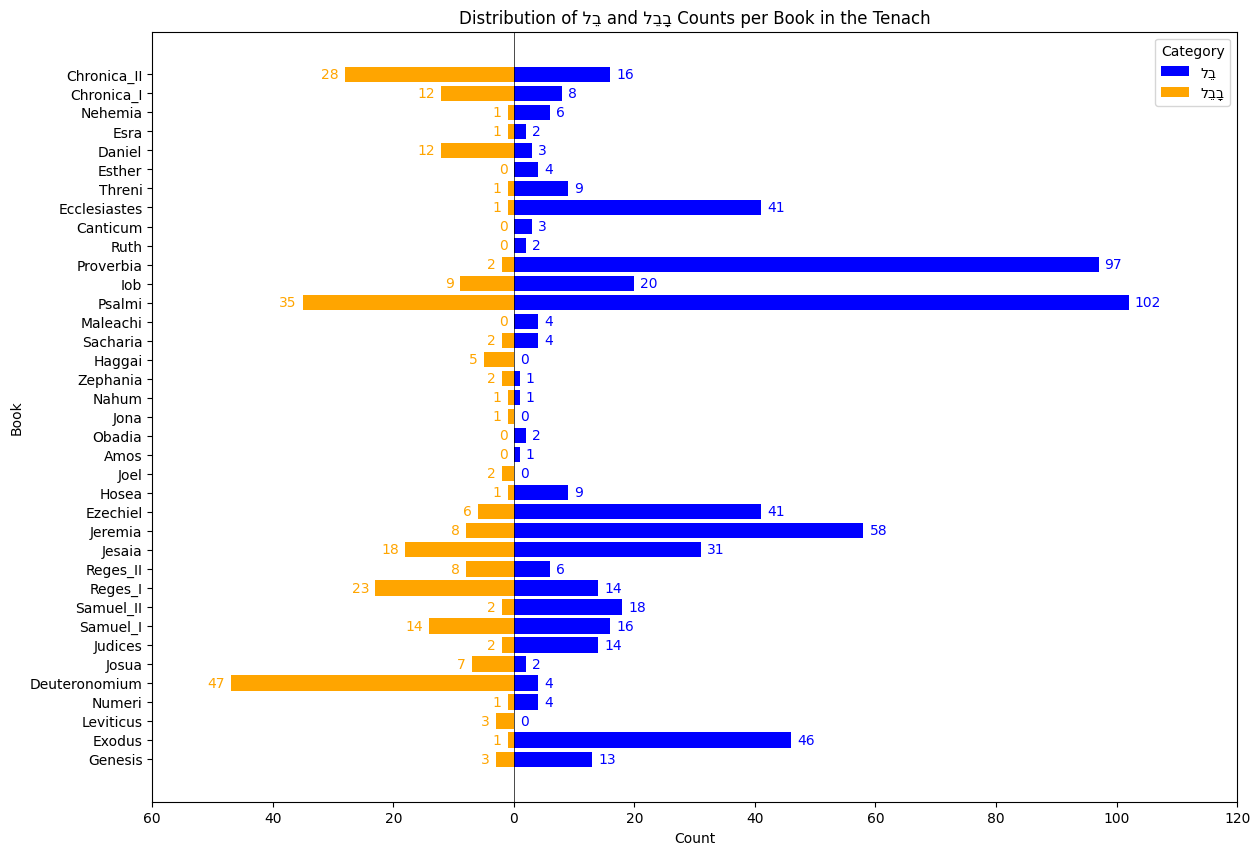

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data setup (replace with your actual data)
# Initialize dictionary for storing results
resultDict = {}

# Process each item in the levResults
for item in levResults:
    book = F.book.v(item[0])
    lex = F.lex.v(item[3])
    
    if book in resultDict:
        # If it exists, add the count to the existing value
        resultDict[book][0] += 1
        if lex == 'LB/':
            resultDict[book][1] += 1
        else:
            resultDict[book][2] += 1
    else:
        # If it doesn't exist, initialize the count as the value
        if lex == 'LB/':
            resultDict[book] = [1, 1, 0]
        else:
            resultDict[book] = [1, 0, 1]

# Convert the dictionary into a DataFrame and sort by total frequency
tableData = pd.DataFrame(
    [[key, value[0], value[1], value[2]] for key, value in resultDict.items()],
    columns=["Book", "Total", "LB", "LBB"]
)

# Set up the data for plotting with LB as positive and LBB as negative values
tableData['LB_Positive'] = tableData['LB']  # LB counts as positive values
tableData['LBB_Negative'] = -tableData['LBB']  # LBB counts as negative values

# Set up the plot
plt.figure(figsize=(14, 10))

# Plot LB (positive values)
lb_bars = plt.barh(tableData["Book"], tableData["LB_Positive"], color='blue', label='לֵב')

# Plot LBB (negative values)
lbb_bars = plt.barh(tableData["Book"], tableData["LBB_Negative"], color='orange', label='לֵבָב')

# Add the counts on each bar
for bar, count in zip(lb_bars, tableData['LB']):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, str(count), va='center', color='blue')

for bar, count in zip(lbb_bars, tableData['LBB']):
    plt.text(bar.get_width() - 1, bar.get_y() + bar.get_height()/2, str(count), va='center', ha='right', color='orange')

# Customize x-axis to show absolute values
x_ticks = plt.xticks()[0]  # Get current tick positions
plt.xticks(x_ticks, [str(int(abs(x))) for x in x_ticks])  # Set absolute values for labels

# Add labels, title, and legend
plt.xlabel("Count")
plt.ylabel("Book")
plt.title('Distribution of לֵב and לֵבָב Counts per Book in the Tenach')
plt.axvline(0, color="black", linewidth=0.5)  # Center line at x=0
plt.legend(title="Category")

# Show the plot
plt.show()

# 4 - Required libraries<a class="anchor" id="bullet4"></a>
##### [Back to TOC](#TOC)

The scripts in this notebook require (beside `text-fabric`) the following Python libraries to be installed in the environment:

    IPython
    pandas
    matplotlib
    seaborn

You can install any missing library from within Jupyter Notebook using either`pip` or `pip3`.

# 5 - Notebook details<a class="anchor" id="bullet6"></a>
##### [Back to TOC](#TOC)

<div style="float: left;">
  <table>
    <tr>
      <td><strong>Author</strong></td>
      <td>Tony Jurg</td>
    </tr>
    <tr>
      <td><strong>Version</strong></td>
      <td>1.0</td>
    </tr>
    <tr>
      <td><strong>Date</strong></td>
      <td>4 Novermber 2024</td>
    </tr>
  </table>
</div>